# Map of Yemen
Creating a map that contains all important parts of the paper:
* Governorates
* Sampling locations
* Geography
* location of population groups that actually cluster well

Run in conda admix environment. Requires Basemap, basemap-data-hires

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 30]
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_90307/3331438558.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


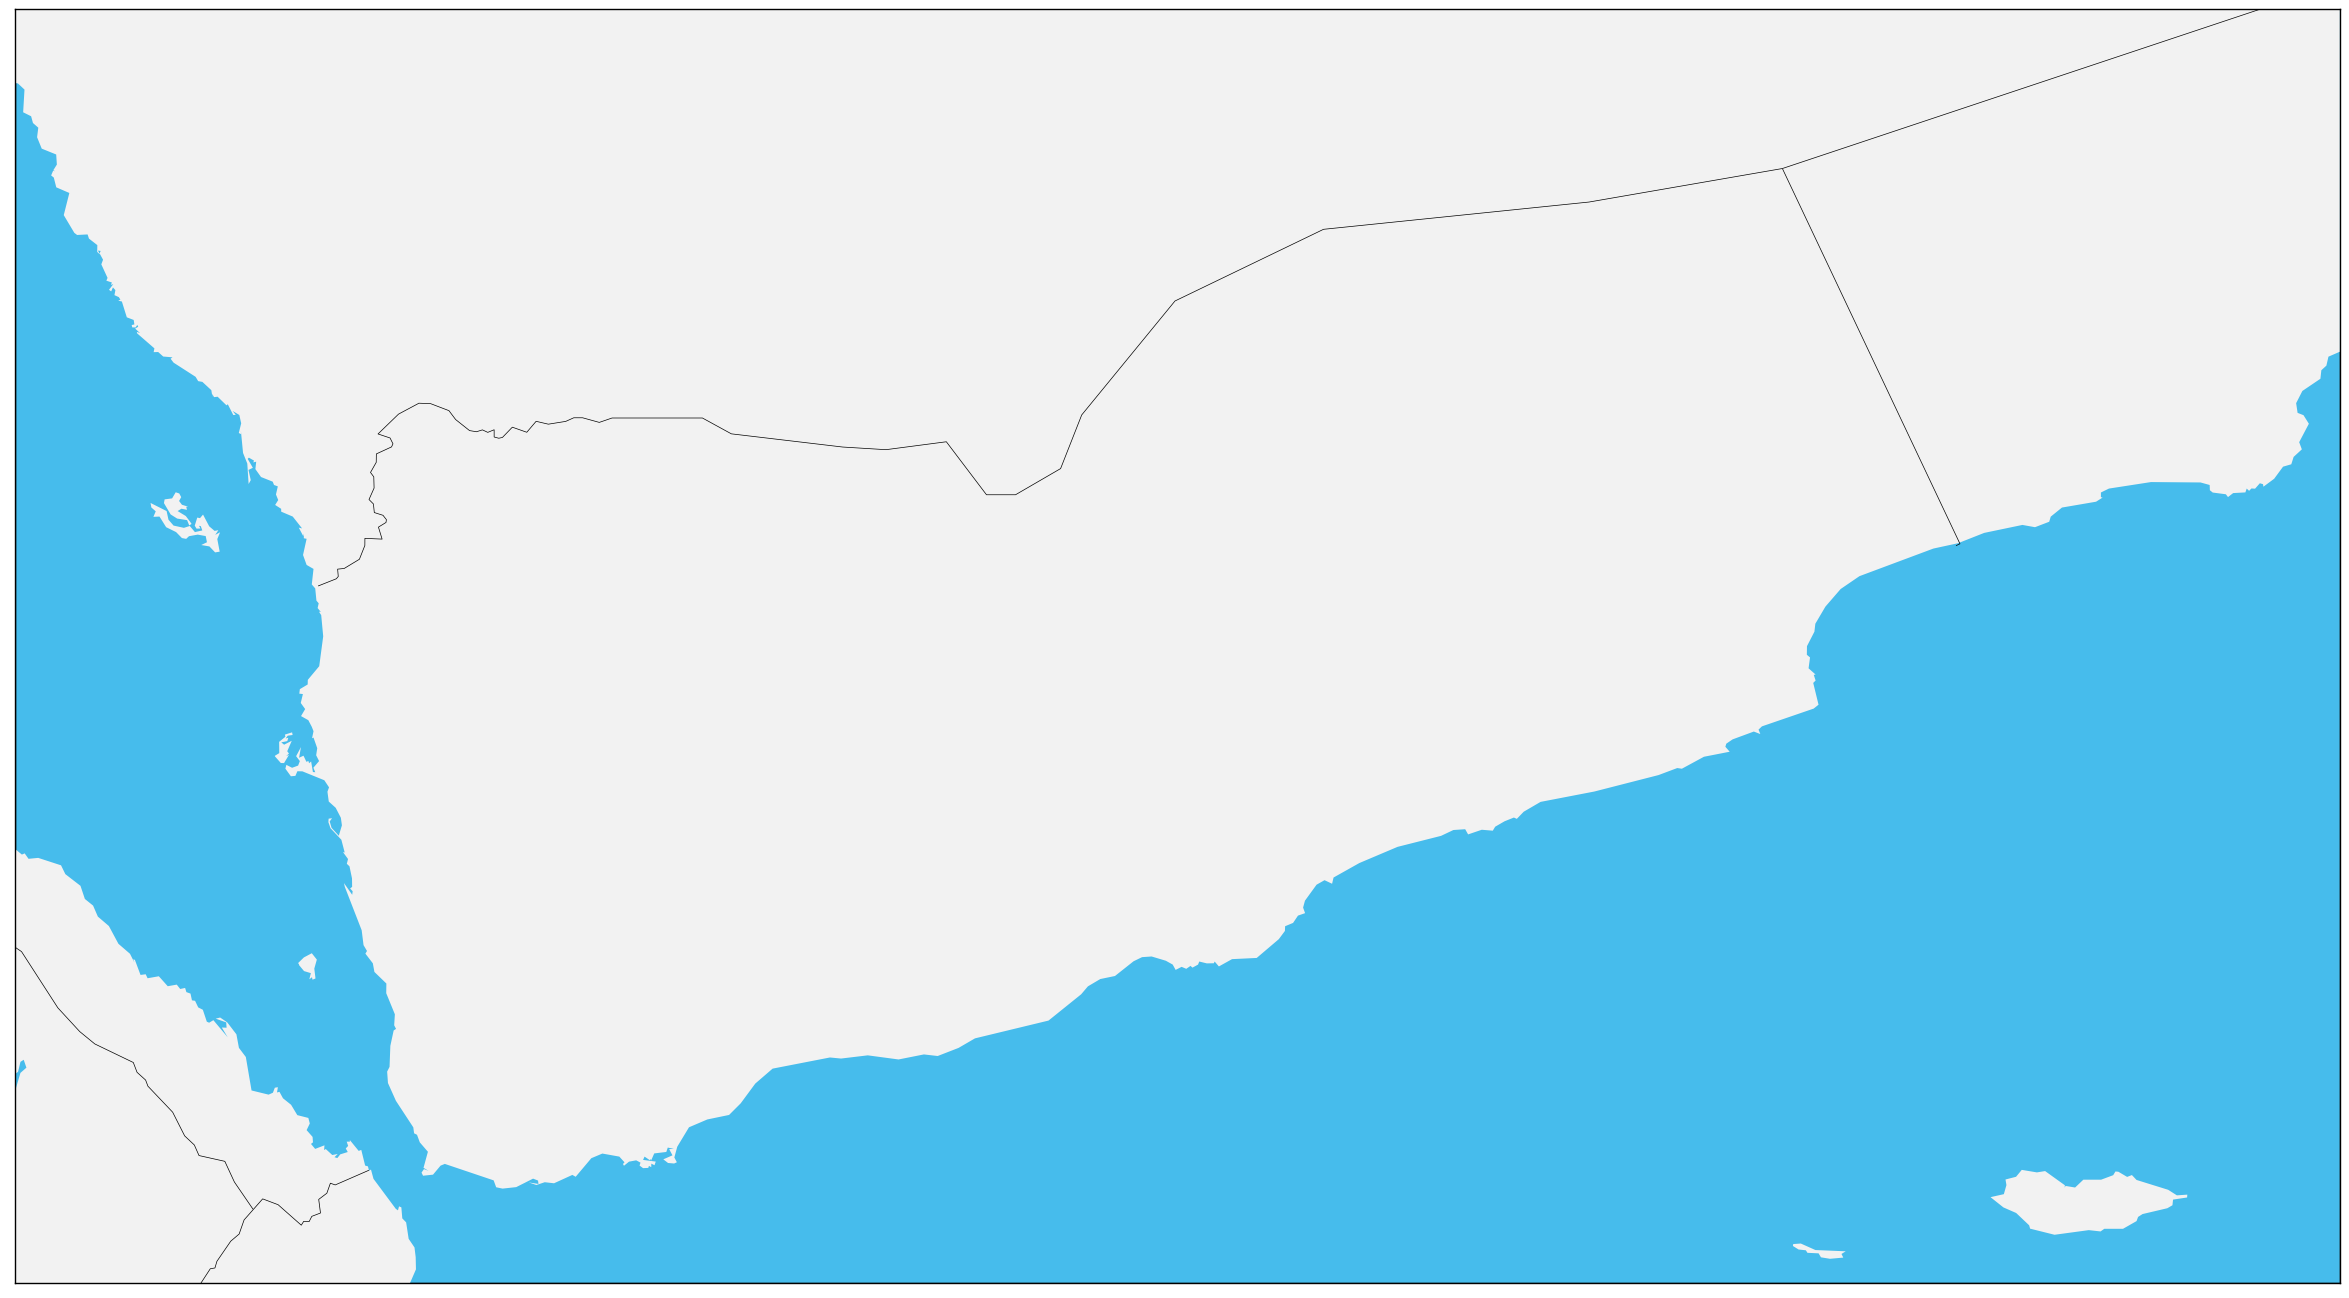

In [2]:
m = Basemap(llcrnrlat=12.0,llcrnrlon=40.9,
            urcrnrlat=20.0,urcrnrlon=55.5, resolution='i')
m.drawmapboundary(fill_color='#46bcec') # Make your map into any style you like
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec') # Make your map into any style you like
#m.drawcoastlines()
#m.drawrivers() # Default colour is black but it can be customised
m.drawcountries()
#m.drawstates(color='b')
m.shadedrelief()
m.etopo()
plt.show()

In [3]:
yemenCoords = pd.read_excel("../Metadata/coords.xlsx")
yemenCoords.loc[5,'long'] = 48.7

In [4]:
yemenCoords

,location,samples,samples_ngs,lat,long
0,Abyan,6,4,13.568675,46.132999
1,Amran,6,4,15.661550,43.946018
2,Bayda,3,3,14.326473,45.380295
3,Dali,8,0,13.922642,44.786675
4,Dhamar,6,4,14.542997,44.400061
5,Hadramout,20,4,15.554870,48.700000
6,Hajjah,8,0,16.117894,43.038230
7,Hudayda,35,5,14.797868,42.954487
8,Ibb,17,4,14.020170,44.103111
9,Jawf,10,0,16.613066,45.616588


array([[<AxesSubplot:title={'center':'samples'}>]], dtype=object)

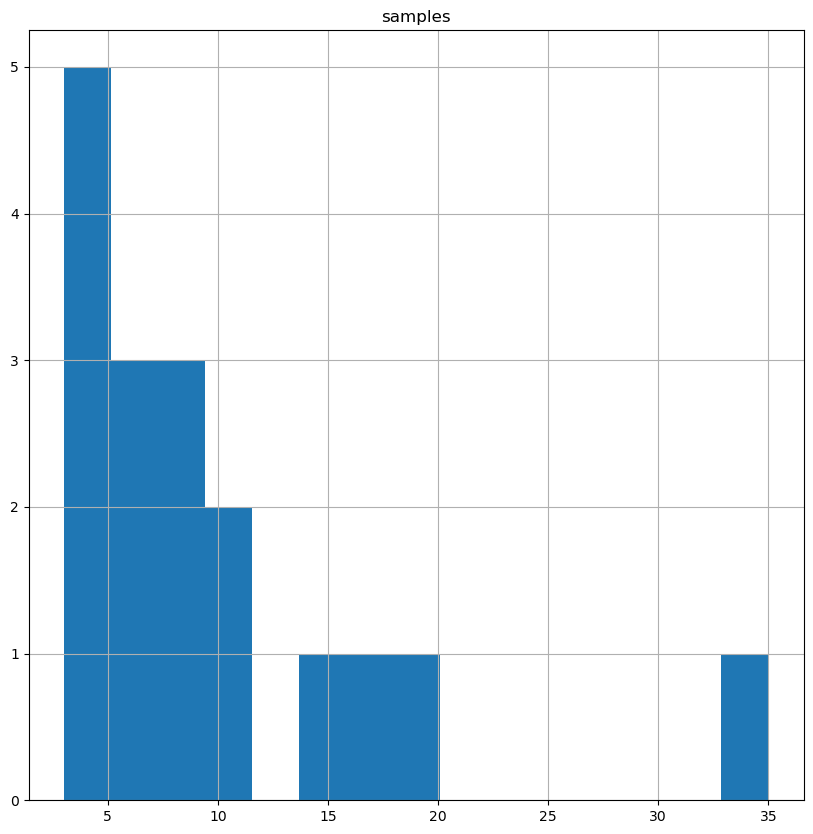

In [5]:
plt.rcParams['figure.figsize'] = [10, 10]
yemenCoords[['samples']].hist(bins=15)

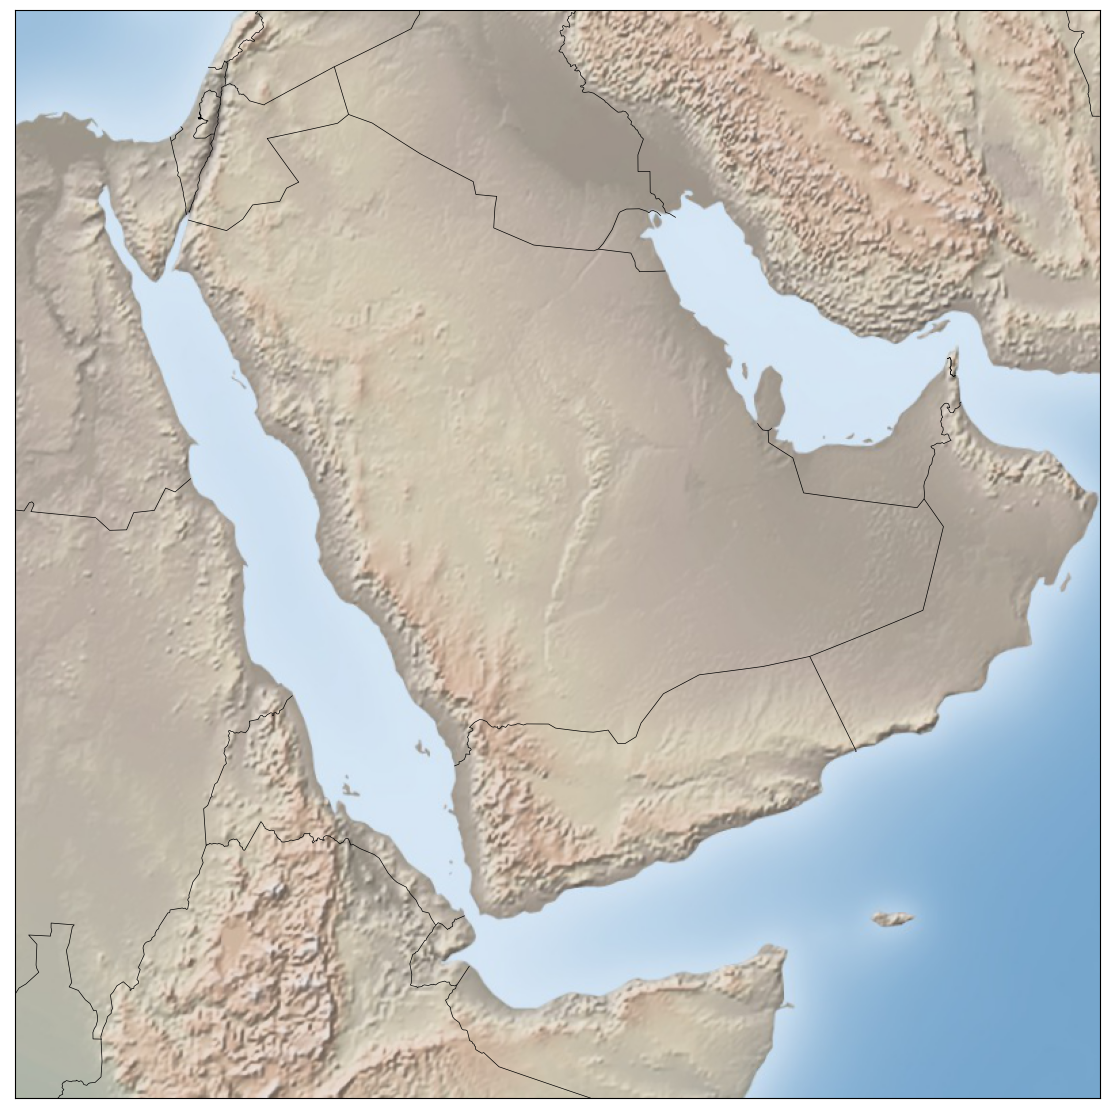

In [5]:
fig = plt.figure(figsize=(14, 18))
m = Basemap(projection='cass', resolution='i',
            llcrnrlat=8.0,llcrnrlon=32.,
            urcrnrlat=34.0,urcrnrlon=61.5, lat_0=10.0, lon_0=46.0)
#m = Basemap(#projection='lcc', 
#            resolution='h',
#            width=2E6, height=2E6, 
#            lat_0=16, lon_0=47,)

#m.etopo(scale=0.5, alpha=0.5)

m.shadedrelief()
#m.bluemarble(scale=1.0)
#m.drawcoastlines()
m.drawcountries()
#m.drawrivers(color='blue')

In [7]:
fig.savefig("arabia.pdf")

569045.7801100591 169283.60288035206
334760.3935141713 403061.2867878096
487904.7339089939 253632.28929285982
423718.4031678039 208972.68305777328
382466.3041056454 278223.22770309553
843892.1373574494 391963.4084018277
238292.2477316155 455012.2576683928
227266.26035776356 308184.56464603887
350030.9292163769 220304.6390729138
513815.9448256389 507839.4449111939
433660.9204990226 112518.26415054861
282424.3405564046 370714.8671081678
484993.72855428513 374839.6372576963
315119.04042847053 546743.8510198797
361882.6608142712 369487.6924080728
633031.5766543333 340684.385825496
340822.14389582485 170874.94843759108


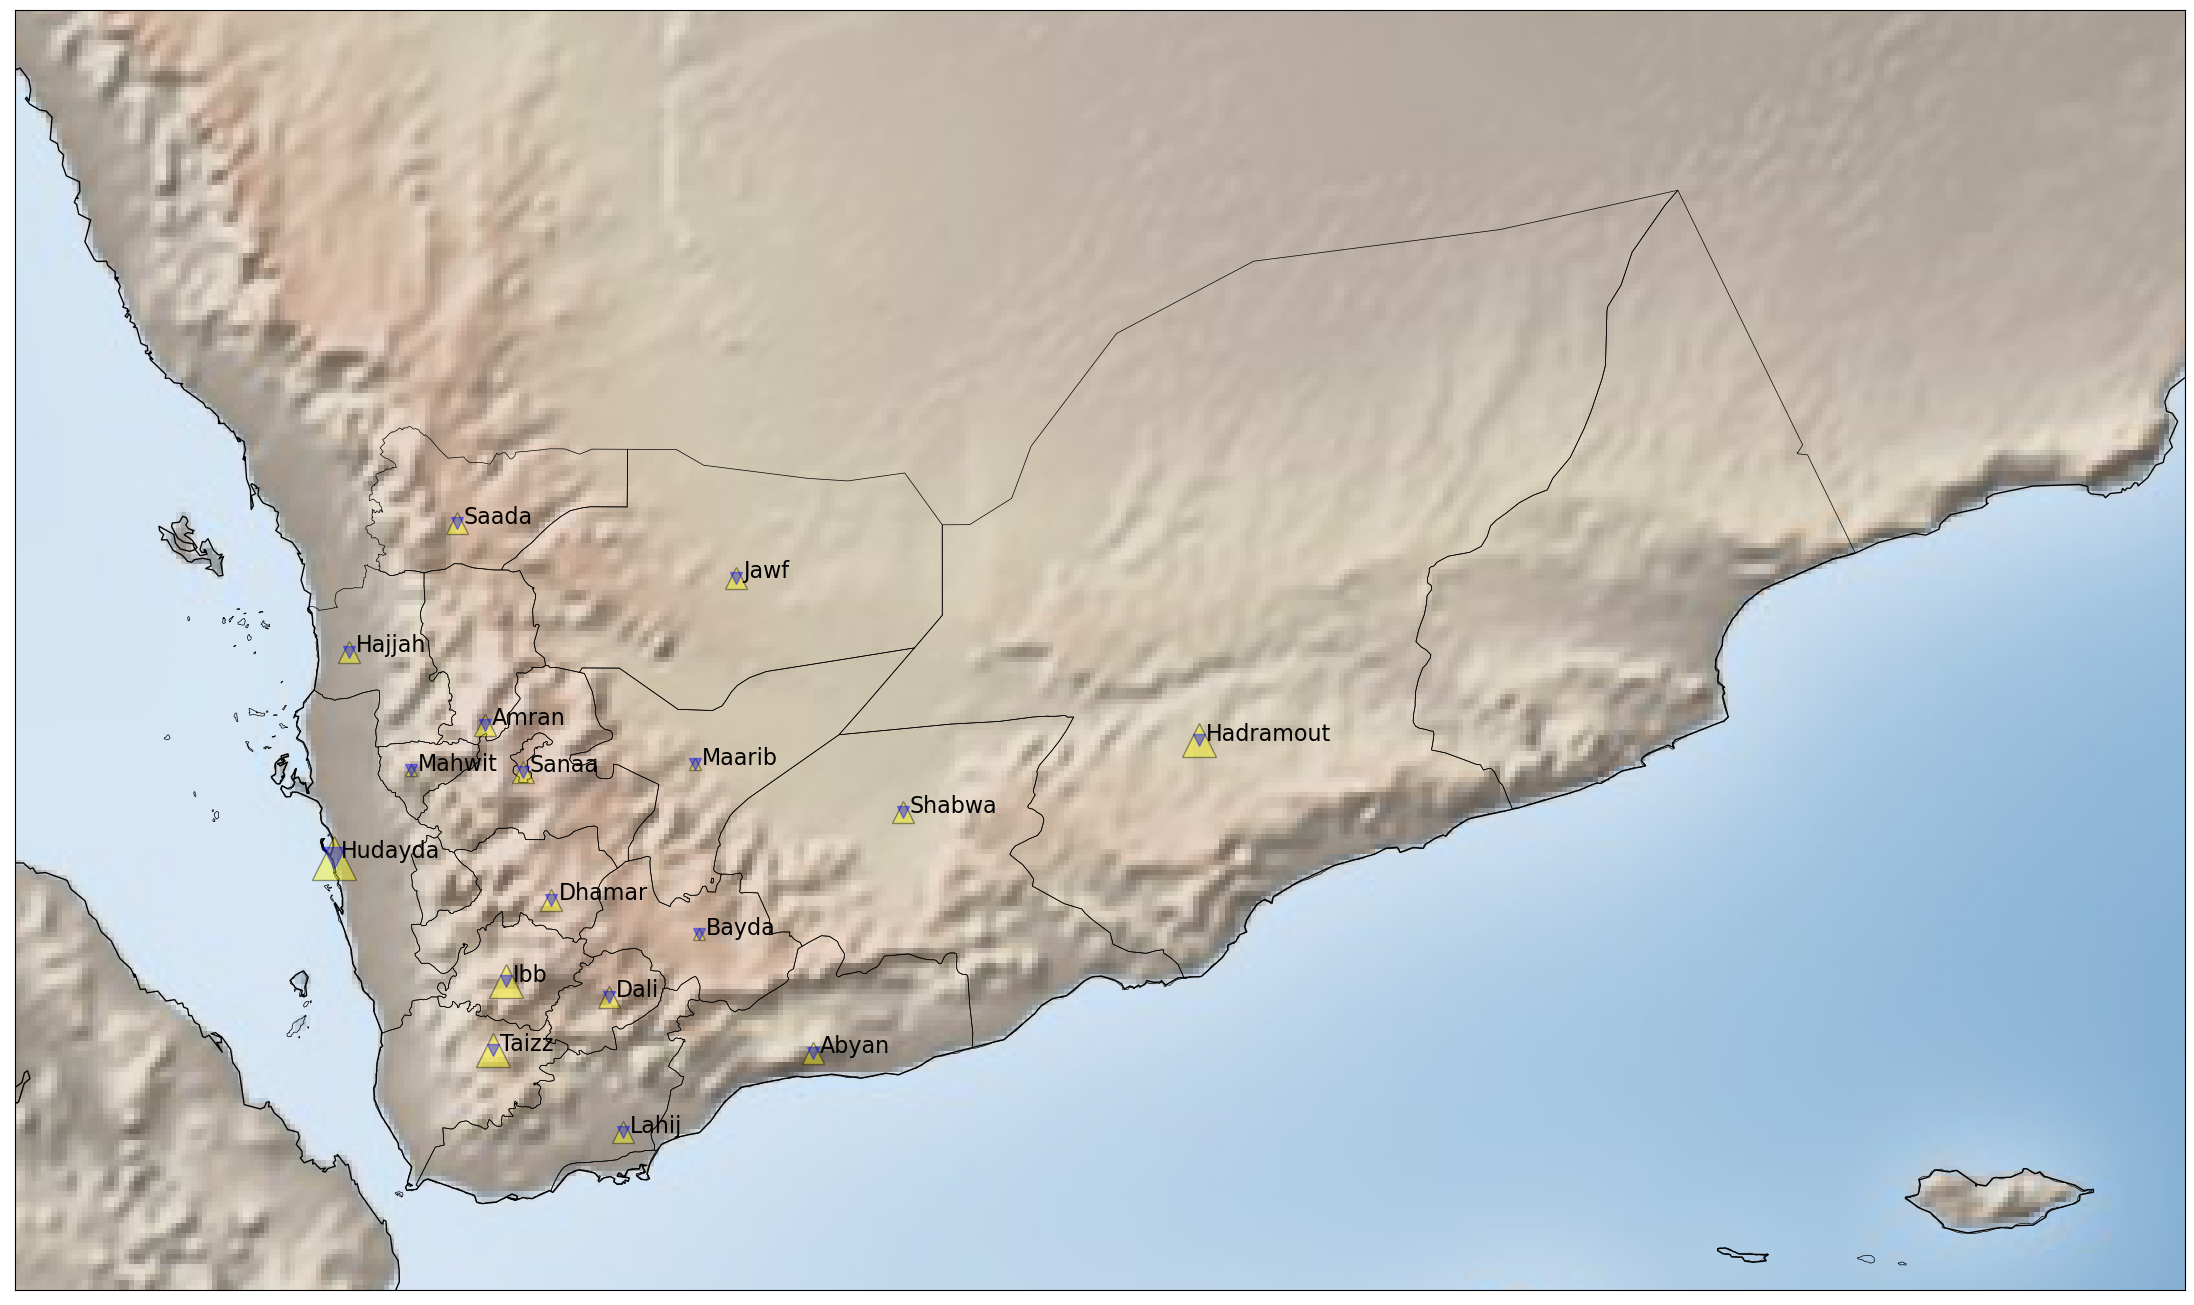

In [6]:
def f(n):
    if n<5: return 4
    elif n<=12: return 8
    elif n<=20: return 12
    else: return 16
    
fig = plt.figure(figsize=(28, 28))
m = Basemap(projection='cass', resolution='i',
            llcrnrlat=12.0,llcrnrlon=40.9,
            urcrnrlat=20.0,urcrnrlon=55.5, lat_0=16.0, lon_0=46.0)

m.shadedrelief()
#m.bluemarble(scale=1.0)
m.drawcoastlines()
#m.drawcountries()
#m.drawstates()
m.readshapefile('Geo/yem_adm_govyem_mola_20181102_SHP/yem_admbnda_adm1_govyem_mola_20181102', 'yem_admbnda_adm0_govyem_mola_20181102')
#m.scatter(yemenCoords['long'].values, yemenCoords['lat'].values, latlon=True, cmap='b', alpha=0.3, s=100*yemenCoords['samples'])
#m.scatter(yemenCoords['long'].values, yemenCoords['lat'].values, latlon=True, c='r', alpha=0.2, s=100*yemenCoords['samples_ngs'])

for i,loc in yemenCoords.iterrows():
    x,y = m(loc['long'], loc['lat'])
    print(x,y)
    plt.plot(x,y, marker='^', markersize=2*f(loc['samples']), markerfacecolor=(1,1,0,0.4), markeredgecolor=(0,0,0,1), alpha=0.4)
    plt.plot(x,y, marker='v', markersize=2*f(loc['samples_ngs']), color='b', alpha=0.4)
    #plt.plot(x,y,'ok', markersize=5)
    plt.text(x+5000,y,loc['location'], fontsize=16)


In [7]:
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

In [8]:
districts = {'Azal': ["Sa'ada", 'Amran', "Sana'a", 'Dhamar'], 
             'Tahamh': ['Al Mahwit', 'Hajjah', 'Raymah'], 
             'Hadramaut':['Hadramaut', 'Shabwah', 'Al Maharah'],  ## East
             'Aljanad': ['Ibb', 'Taizz'], 
             'Sheba': ['Al Jawf', 'Marib', 'Al Bayda'], ## North/Desert
             'Aden': ["Al Dhale'e", 'Lahj', 'Abyan', 'Aden'],  ## South/Coast
             'Hudaydah': ['Al Hudaydah']}  ## West/Coast
districtsR = {}
for k,v in districts.items():
    for gov in v:
        districtsR[gov] = k
for k,v in districtsR.items():
    print(f'"{k}"="{v}"', end=', ')
print()

"Sa'ada"="Azal", "Amran"="Azal", "Sana'a"="Azal", "Dhamar"="Azal", "Al Mahwit"="Tahamh", "Hajjah"="Tahamh", "Raymah"="Tahamh", "Hadramaut"="Hadramaut", "Shabwah"="Hadramaut", "Al Maharah"="Hadramaut", "Ibb"="Aljanad", "Taizz"="Aljanad", "Al Jawf"="Sheba", "Marib"="Sheba", "Al Bayda"="Sheba", "Al Dhale'e"="Aden", "Lahj"="Aden", "Abyan"="Aden", "Aden"="Aden", "Al Hudaydah"="Hudaydah", 


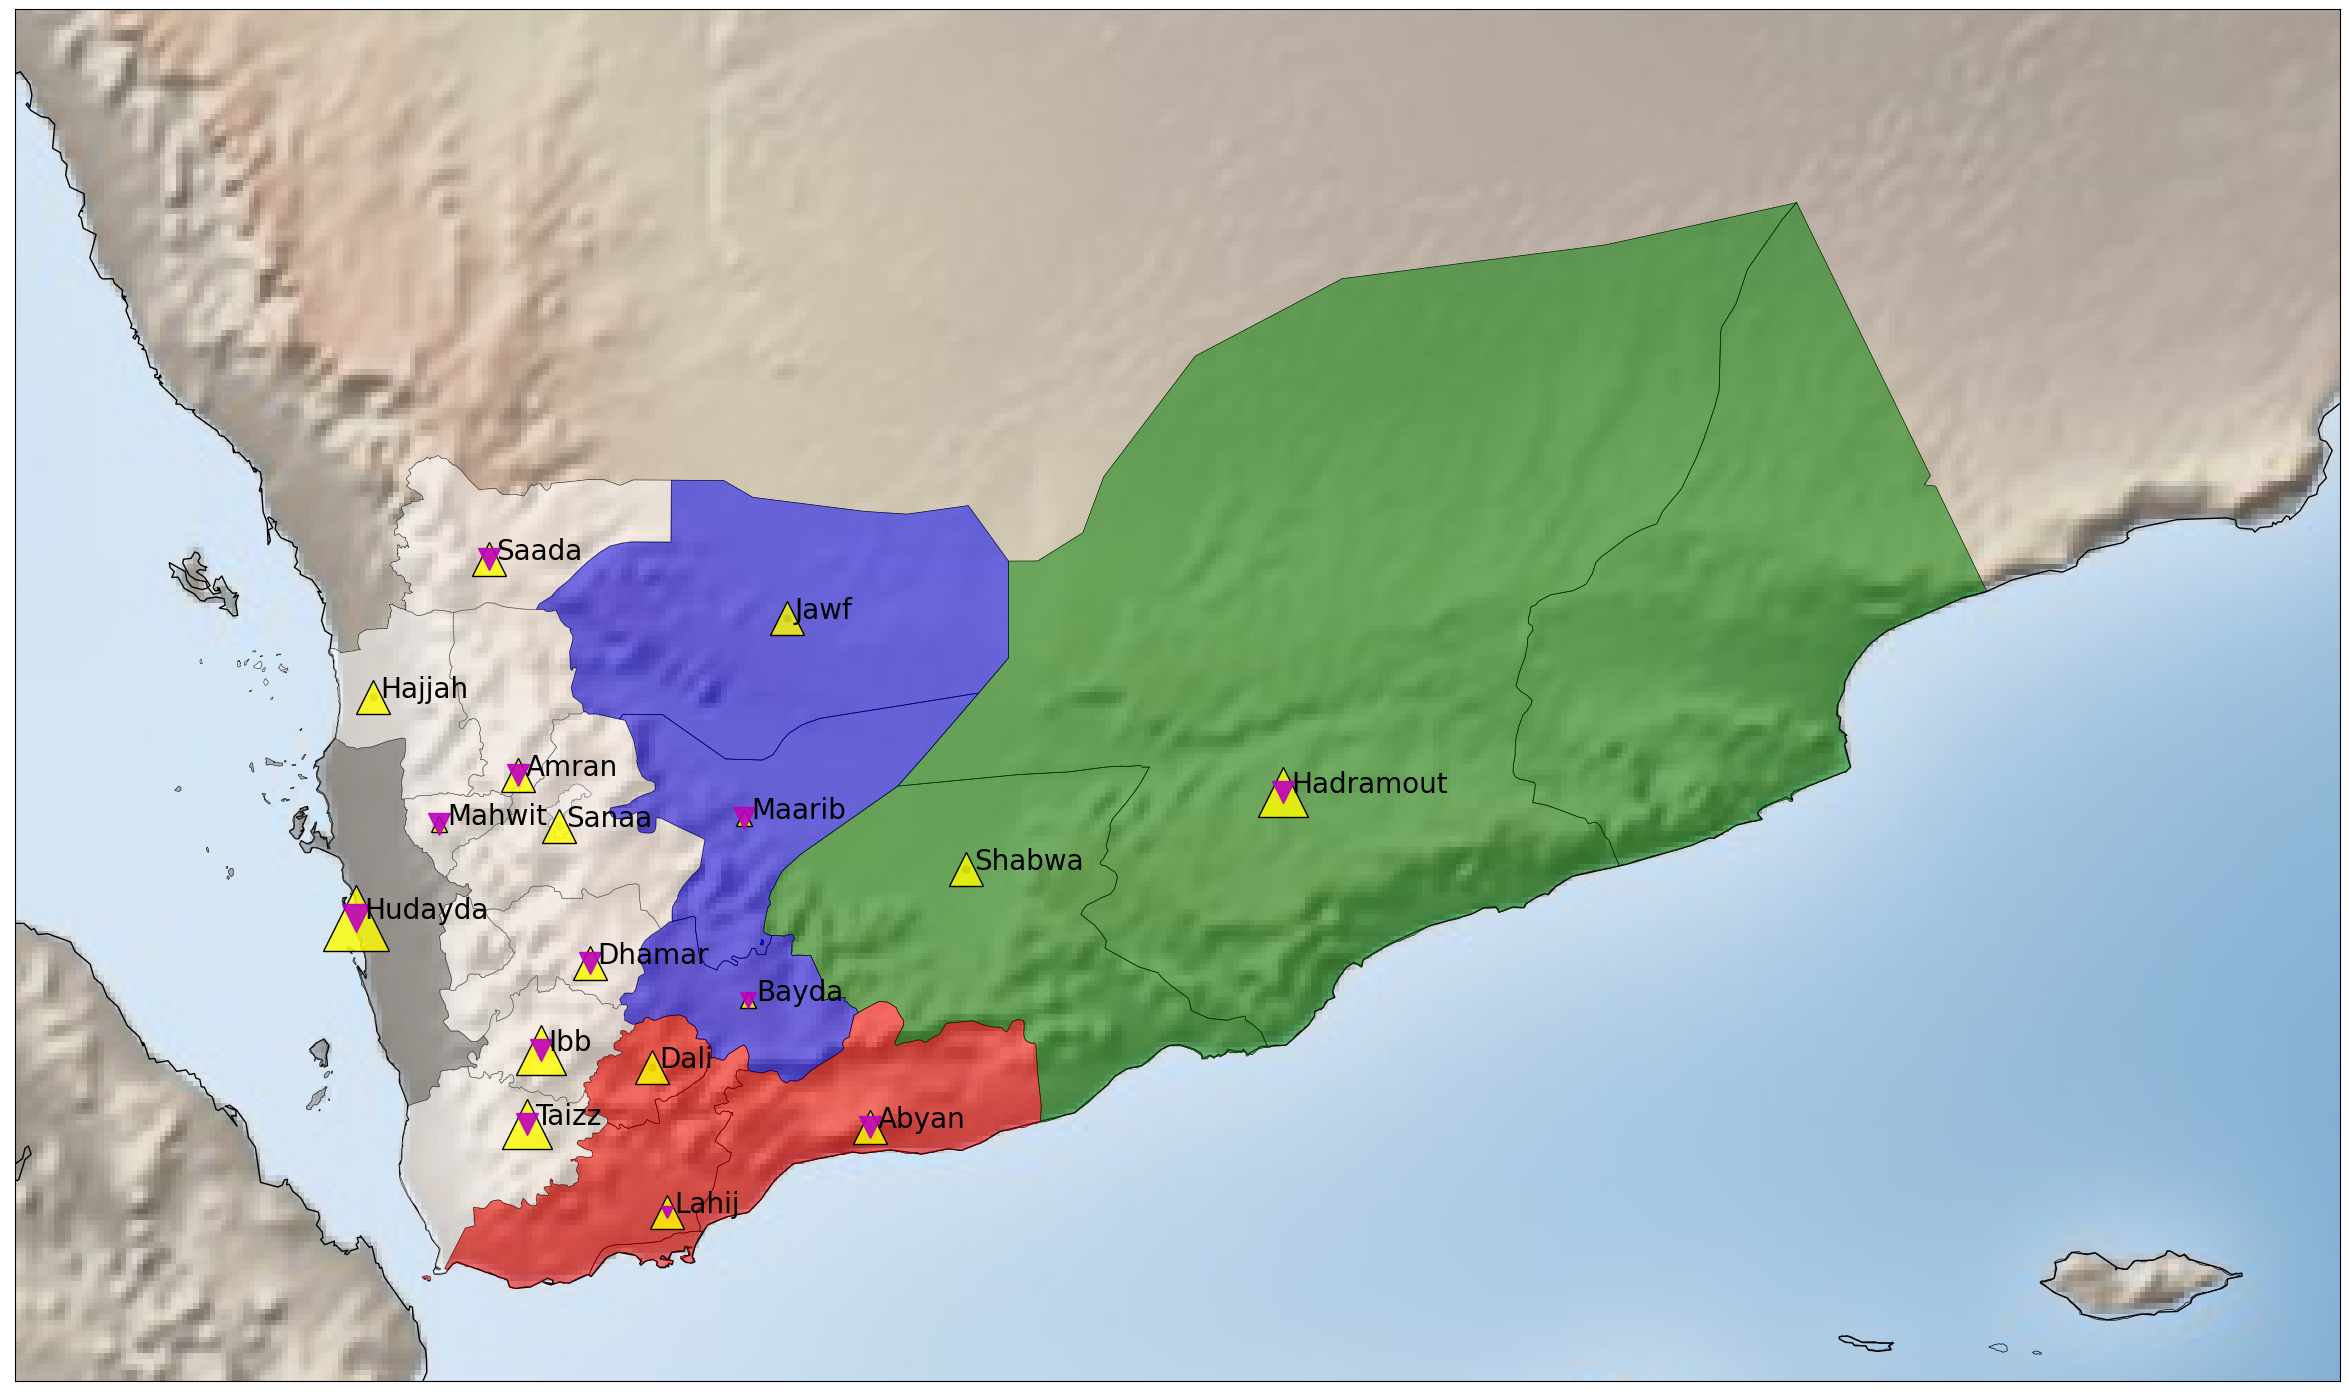

In [26]:

fig = plt.figure(figsize=(30, 30))
ax      = fig.add_subplot(111)

m = Basemap(projection='cass', resolution='i',
            llcrnrlat=12.0,llcrnrlon=40.9,
            urcrnrlat=20.0,urcrnrlon=55.5, lat_0=16.0, lon_0=46.0)

m.shadedrelief()
m.drawcoastlines()
m.readshapefile('Geo/yem_adm_govyem_mola_20181102_SHP/yem_admbnda_adm1_govyem_mola_20181102', 'yem_admbnda_adm0_govyem_mola_20181102')

for i,loc in yemenCoords.iterrows():
    x,y = m(loc['long'], loc['lat'])
    plt.plot(x,y,'ok', markersize=5)
    #plt.text(x+5000,y,loc['location'], fontsize=16)
districts = {'Azal': ["Sa'ada", 'Amran', "Sana'a", 'Dhamar'], 
             'Tahamh': ['Al Mahwit', 'Hajjah', 'Raymah'], 
             'Hadramaut':['Hadramaut', 'Shabwah', 'Al Maharah'],  ## East
             'Aljanad': ['Ibb', 'Taizz'], 
             'Sheba': ['Al Jawf', 'Marib', 'Al Bayda'], ## North/Desert
             'Aden': ["Al Dhale'e", 'Lahj', 'Abyan', 'Aden'],  ## South/Coast
             'Hudaydah': ['Al Hudaydah']}  ## West/Coast
districtsR = {}
for k,v in districts.items():
    for gov in v:
        districtsR[gov] = k

patches = defaultdict(list)
for info, shape in zip(m.yem_admbnda_adm0_govyem_mola_20181102_info, m.yem_admbnda_adm0_govyem_mola_20181102):
    gov = info['ADM1_EN']
    if gov in districtsR:
        distr = districtsR[gov]
        patches[gov].append(Polygon(np.array(shape), True))

selDistricts = 'Hudaydah Aden Hadramaut Sheba Azal Tahamh Aljanad'.split()
colors = "krgbwww"

colorDict = dict(zip(selDistricts, colors))
for gov, patch in patches.items():  
    distr = districtsR[gov]
    color = colorDict[distr]
    if color=='k': color='gray'
    ax.add_collection(PatchCollection(patch, facecolor=color, linewidths=1., zorder=2, alpha=0.5))
for i,loc in yemenCoords.iterrows():
    x,y = m(loc['long'], loc['lat'])
    ax.plot(x,y, marker='^', markersize=3*f(loc['samples']), markerfacecolor=(1,1,0,0.8), markeredgecolor=(0,0,0,1))
    ax.plot(x,y, marker='v', markersize=4*(loc['samples_ngs']), color='m', alpha=0.9)
    #plt.plot(x,y,'ok', markersize=5)
    ax.text(x+5000,y,loc['location'], fontsize=20)

In [27]:
fig.savefig('yemenMap1.pdf')

In [25]:
print(yemenCoords.to_latex(index=False))

,location,samples,samples_ngs,lat,long
0,Abyan,6,4,13.568675,46.132999
1,Amran,6,4,15.661550,43.946018
2,Bayda,3,3,14.326473,45.380295
3,Dali,8,0,13.922642,44.786675
4,Dhamar,6,4,14.542997,44.400061
5,Hadramout,20,4,15.554870,48.700000
6,Hajjah,8,0,16.117894,43.038230
7,Hudayda,35,5,14.797868,42.954487
8,Ibb,17,4,14.020170,44.103111
9,Jawf,10,0,16.613066,45.616588


In [ ]:
def f(n):
    if n<5: return 4
    elif n<=12: return 8
    elif n<=20: return 12
    else: return 16

In [29]:
pd.options.display.float_format = '{:,.3f}'.format
print(yemenCoords.to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
 location &  samples &  samples\_ngs &    lat &   long \\
\midrule
    Abyan &        6 &            4 & 13.569 & 46.133 \\
    Amran &        6 &            4 & 15.662 & 43.946 \\
    Bayda &        3 &            3 & 14.326 & 45.380 \\
     Dali &        8 &            0 & 13.923 & 44.787 \\
   Dhamar &        6 &            4 & 14.543 & 44.400 \\
Hadramout &       20 &            4 & 15.555 & 48.700 \\
   Hajjah &        8 &            0 & 16.118 & 43.038 \\
  Hudayda &       35 &            5 & 14.798 & 42.954 \\
      Ibb &       17 &            4 & 14.020 & 44.103 \\
     Jawf &       10 &            0 & 16.613 & 45.617 \\
    Lahij &        5 &            2 & 13.056 & 44.883 \\
   Mahwit &        3 &            4 & 15.366 & 43.461 \\
   Maarib &        4 &            4 & 15.416 & 45.350 \\
    Saada &        5 &            4 & 16.951 & 43.748 \\
    Sanaa &       10 &            0 & 15.362 & 44.202 \\
   Shabwa &        9 &            0 & 15.109 &

/tmp/ipykernel_90307/1575688045.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(yemenCoords.to_latex(index=False))


In [11]:
plt.legend_elements(prop="sizes")

AttributeError: module 'matplotlib.pyplot' has no attribute 'legend_elements'

Al Maharah not in districtR
Al Mahwit not in districtR
Amanat Al Asimah not in districtR
Amran not in districtR
Dhamar not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Hajjah not in districtR
Ibb not in districtR
Raymah not in districtR
Sa'ada not in districtR
Sana'a not in districtR
Sana'a not in districtR
Socotra not in districtR
Socotra not in districtR
Socotra not in districtR
Socotra not in districtR
Taizz not in districtR


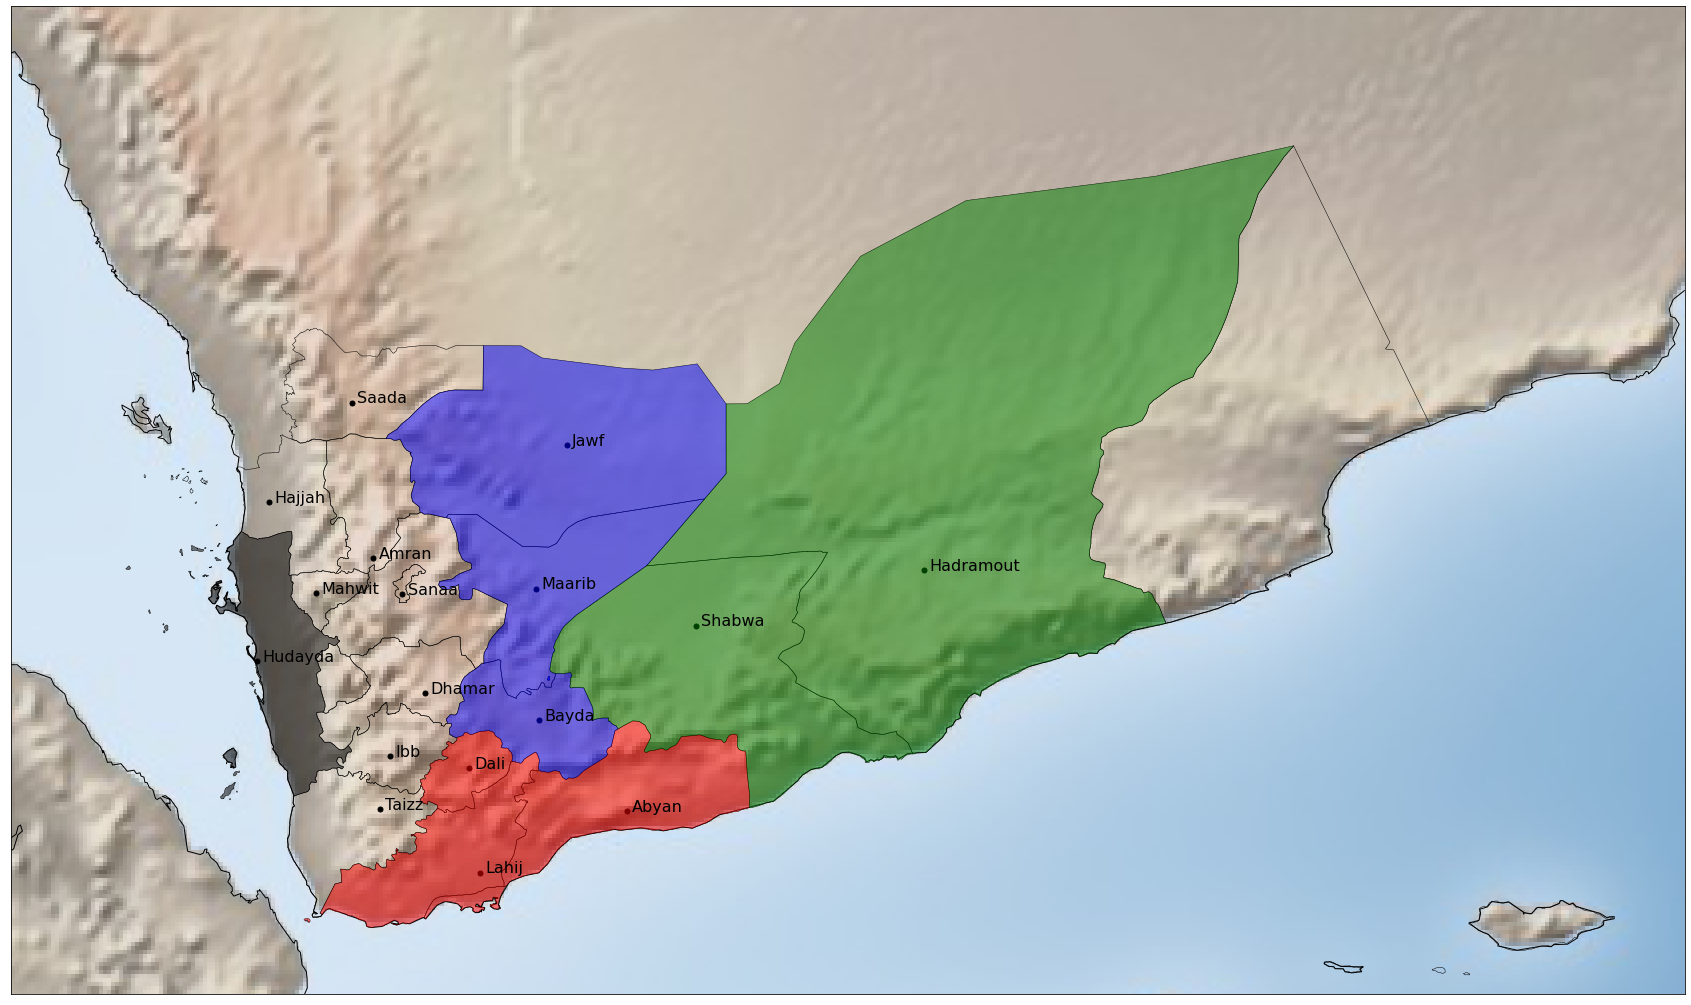

In [67]:
fig = plt.figure(figsize=(30, 30))
ax      = fig.add_subplot(111)

m = Basemap(projection='cass', resolution='i',
            llcrnrlat=12.0,llcrnrlon=40.9,
            urcrnrlat=20.0,urcrnrlon=55.5, lat_0=16.0, lon_0=46.0)

m.shadedrelief()
m.drawcoastlines()
m.readshapefile('Geo/yem_adm_govyem_mola_20181102_SHP/yem_admbnda_adm1_govyem_mola_20181102', 'yem_admbnda_adm0_govyem_mola_20181102')

for i,loc in yemenCoords.iterrows():
    x,y = m(loc['long'], loc['lat'])
    plt.plot(x,y,'ok', markersize=5)
    plt.text(x+5000,y,loc['location'], fontsize=16)

districtsR = {}
for k,v in districts.items():
    for gov in v:
        districtsR[gov] = k

patches = defaultdict(list)
for info, shape in zip(m.yem_admbnda_adm0_govyem_mola_20181102_info, m.yem_admbnda_adm0_govyem_mola_20181102):
    gov = info['ADM1_EN']
    if gov in districtsR:
        distr = districtsR[gov]
        patches[gov].append(Polygon(np.array(shape), True))
    else:
        print(gov,'not in districtR')

selDistricts = 'Hudaydah Aden Hadramaut Sheba'.split()
colors = "krgbwww"

colorDict = dict(zip(selDistricts, colors))
for gov, patch in patches.items():  
    distr = districtsR[gov]
    color = colorDict[distr]
    ax.add_collection(PatchCollection(patch, facecolor=color, linewidths=1., zorder=2, alpha=0.5))

In [59]:
districtsR[gov]

'Hadramaut'

In [22]:
info

{'Shape_Leng': 6.87456624452,
 'Shape_Area': 1.37460846306,
 'ADM1_EN': 'Abyan',
 'ADM1_AR': 'أبين',
 'ADM1_PCODE': 'YE12',
 'ADM1_REF': '',
 'ADM1ALT1EN': '',
 'ADM1ALT2EN': '',
 'ADM1ALT1AR': '',
 'ADM1ALT2AR': '',
 'ADM0_EN': 'Yemen',
 'ADM0_AR': 'اليمن',
 'ADM0_PCODE': 'YE',
 'date': datetime.date(2015, 11, 1),
 'validOn': datetime.date(2018, 11, 2),
 'validTo': None,
 'RINGNUM': 1,
 'SHAPENUM': 1}